In [27]:
#standard library
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Data analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Statsmodel
import statsmodels.api as sm

#load data
df = sm.datasets.fair.load_pandas().data

df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


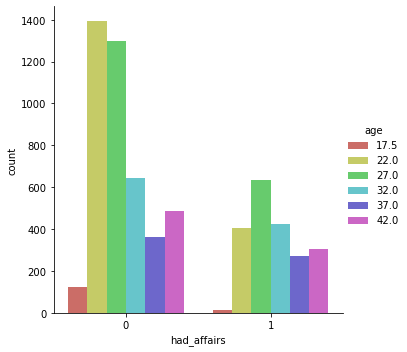

In [28]:
#created a new columns called had_affairs
def affair_category(x):
    if x != 0:
        return 1
    else:
        return 0

df['had_affairs'] = df['affairs'].apply(affair_category)

df.groupby('had_affairs').mean()

sns.catplot(x='had_affairs', data=df, kind='count', hue='age', palette='hls')

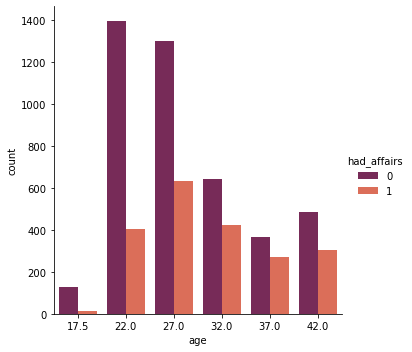

In [29]:
sns.catplot(x='age', data=df, kind='count', hue='had_affairs', palette='rocket')

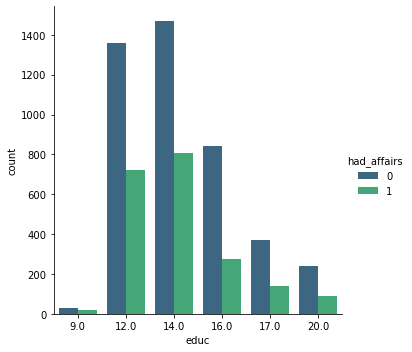

In [30]:
sns.catplot(x='educ', data=df, kind='count', hue='had_affairs', palette='viridis')

In [31]:
#create dummy variables
occ_dummies = pd.get_dummies(df['occupation'])
hocc_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4','occ5', 'occ6']
hocc_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

new_df = df.drop(['occupation', 'occupation_husb', 'had_affairs'], axis=1)

dummies_variable = pd.concat([occ_dummies, hocc_dummies], axis=1)

X = pd.concat([new_df, dummies_variable], axis=1)

In [32]:
#drop one dummy variable to set as reference category
X = X.drop(['occ1','hocc1', 'affairs'], axis=1)

In [33]:
#set the target variable
Y = df.had_affairs

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affairs, dtype: int64

In [34]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [42]:
#logistic Regression Test
Y = np.ravel(Y)

log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.coef_

log_model.score(X,Y)


C:\Users\ruhun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.726358781024191

In [36]:
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

coeff_df

,0,1
0,rate_marriage,[-0.6947601576982815]
1,age,[-0.056652731552479685]
2,yrs_married,[0.09947005041027217]
3,children,[0.03473022628566755]
4,religious,[-0.3631962357343972]
5,educ,[0.015395179585093606]
6,occ2,[0.35461425073526387]
7,occ3,[0.6254157547564756]
8,occ4,[0.3415545760204117]
9,occ5,[0.901300519009618]


In [43]:
#Logistic Regression Test Train & Test
#Stratify =  returns training and test subsets that have the same proportions of class labels as the input dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y)

log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

class_predict = log_model2.predict(X_test)

metrics.accuracy_score(Y_test, class_predict)

C:\Users\ruhun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7342964824120602